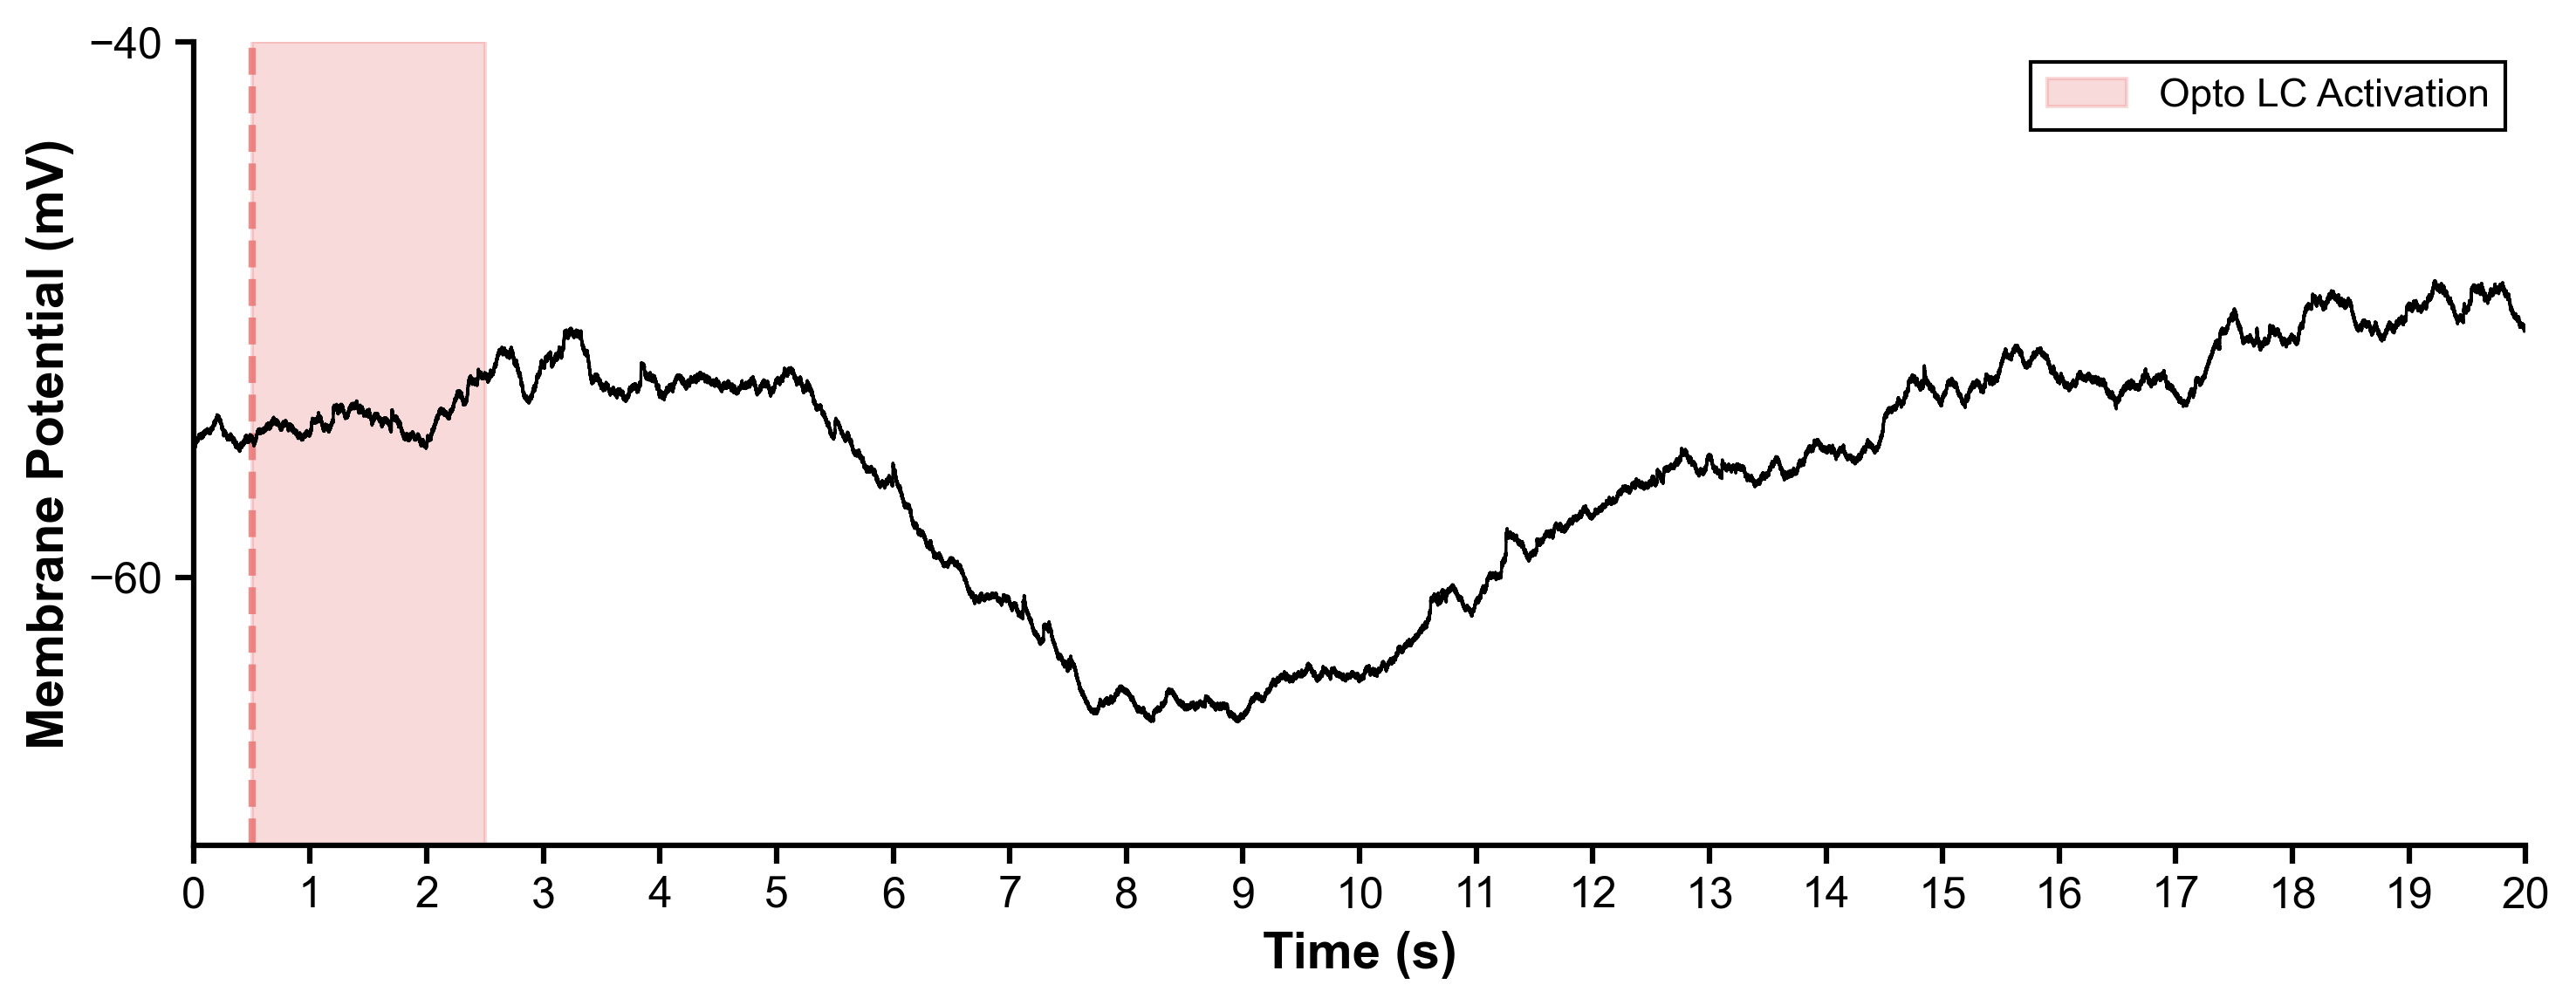

In [ ]:
"""
This script plots a current clamp recording showing transient spiking opto at 2s.
"""

import pyabf 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

# Set up plotting style for publication
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5

# Load your ABF file
base_dir = "Z:\\Group Members\\Rima\\Ephys_NE\\DATA\\Opto_Cohort1"
abf = pyabf.ABF(os.path.join(base_dir, "12.12.2025 M3/2025_12_12_0020.abf"))

# Select sweep (or average multiple sweeps)
abf.setSweep(0)  # Change sweep number as needed
time = abf.sweepX
voltage = abf.sweepY

# Create single plot
fig, ax1 = plt.subplots(1, 1, figsize=(10, 4))

# ============== Plot: Full trace ==============
ax1.plot(time, voltage, color='black', linewidth=0.8)

# Add shaded region to highlight opto period (2 seconds)
opto_start = 5  # seconds
opto_duration = 2.0  # seconds
ax1.axvspan(opto_start, opto_start + opto_duration, 
            color='#EB6F6F', alpha=0.25, label='Opto LC Activation', zorder=0)

# Add vertical line at opto onset
ax1.axvline(x=opto_start, color='#EB6F6F', linestyle='--', 
            linewidth=2, alpha=0.8, zorder=1)

# Formatting
ax1.set_xlabel('Time (s)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Membrane Potential (mV)', fontsize=14, fontweight='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Clean x-axis formatting
# Calculate a nice range (round to nearest second)
time_max = np.ceil(time.max())
ax1.set_xlim([0, time_max])

# Set major ticks at whole seconds
ax1.xaxis.set_major_locator(MultipleLocator(1.0))  # Every 1 second

# Set y-axis limits with some padding
voltage_min = np.floor(voltage.min() / 10) * 10
voltage_max = np.ceil(voltage.max() / 10) * 10
ax1.set_ylim([voltage_min, voltage_max])
ax1.yaxis.set_major_locator(MultipleLocator(20))  # Every 20 mV

# Add legend with clean formatting
ax1.legend(loc='upper right', fontsize=11, frameon=True, 
          fancybox=False, edgecolor='black', framealpha=1)


plt.tight_layout()

plt.show()